# Exploratory Data Analysis

### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/hidden_test.csv')

### Inspecting and cleaning the data

In [3]:
train.shape, test.shape

((90000, 54), (10000, 53))

In [4]:
train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', 'target'],
      dtype='object')

In [5]:
test.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52'],
      dtype='object')

We have 53 anonimized features and a target variable in the dataset. Train has 9000 entries. Test has same features in 1000 entries without target column. We can't make any preassumptions about the domain and feature importance in this case, so let's inspect the data.

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


From the first glance, the data is well structured. We have some integer and some float values, we can already see that column 8 seems to be binary.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

We don't have missing or null values.

All values are numerical. Columns 0-5 and 8-12 are integers, we will try to understand their nature.

In [9]:
for column in train.columns:
    unique_values = train[column].nunique()
    print(f'{column}: {unique_values} unique values')

0: 500 unique values
1: 500 unique values
2: 500 unique values
3: 500 unique values
4: 500 unique values
5: 500 unique values
6: 199 unique values
7: 90000 unique values
8: 2 unique values
9: 500 unique values
10: 500 unique values
11: 500 unique values
12: 500 unique values
13: 90000 unique values
14: 90000 unique values
15: 90000 unique values
16: 90000 unique values
17: 90000 unique values
18: 90000 unique values
19: 90000 unique values
20: 90000 unique values
21: 90000 unique values
22: 90000 unique values
23: 90000 unique values
24: 90000 unique values
25: 90000 unique values
26: 90000 unique values
27: 90000 unique values
28: 90000 unique values
29: 90000 unique values
30: 90000 unique values
31: 90000 unique values
32: 90000 unique values
33: 90000 unique values
34: 90000 unique values
35: 90000 unique values
36: 90000 unique values
37: 90000 unique values
38: 90000 unique values
39: 90000 unique values
40: 90000 unique values
41: 90000 unique values
42: 90000 unique values
43: 

Column 8 is indeed binary.
Columns 0-6 and 9-12 can be high-cardinality categorical variables.

In [10]:
train.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.424,144.336,0.000,125.000,250.000,374.000,499.000
1,90000.0,250.236,144.022,0.000,126.000,251.000,375.000,499.000
2,90000.0,248.637,144.108,0.000,124.000,248.000,374.000,499.000
3,90000.0,249.737,144.285,0.000,125.000,250.000,375.000,499.000
4,90000.0,249.436,143.942,0.000,125.000,250.000,373.000,499.000
5,90000.0,249.656,144.329,0.000,124.000,250.000,374.000,499.000
6,90000.0,-0.011,7.038,-9.950,-7.071,0.000,7.000,9.950
7,90000.0,0.499,0.289,0.000,0.249,0.497,0.748,1.000
8,90000.0,0.499,0.500,0.000,0.000,0.000,1.000,1.000
9,90000.0,249.842,144.613,0.000,124.000,250.000,376.000,499.000


So, what do we have here.

Columns 0-5, 9-12 are of 500 unique integer values from 0-500. *Suspected to be categorical*

Column 6 is 199 unique float values ~(-10, 10) *Also suspected to be categorical?*

One binary feature 8.

And 13-52 features are all unique float values of the same scale, central tendency and dispersion, seem to be with no outliers, and of normal distribution.

Let's visualise distributions.

### Univariate analysis

Integer columns with values 0-500:

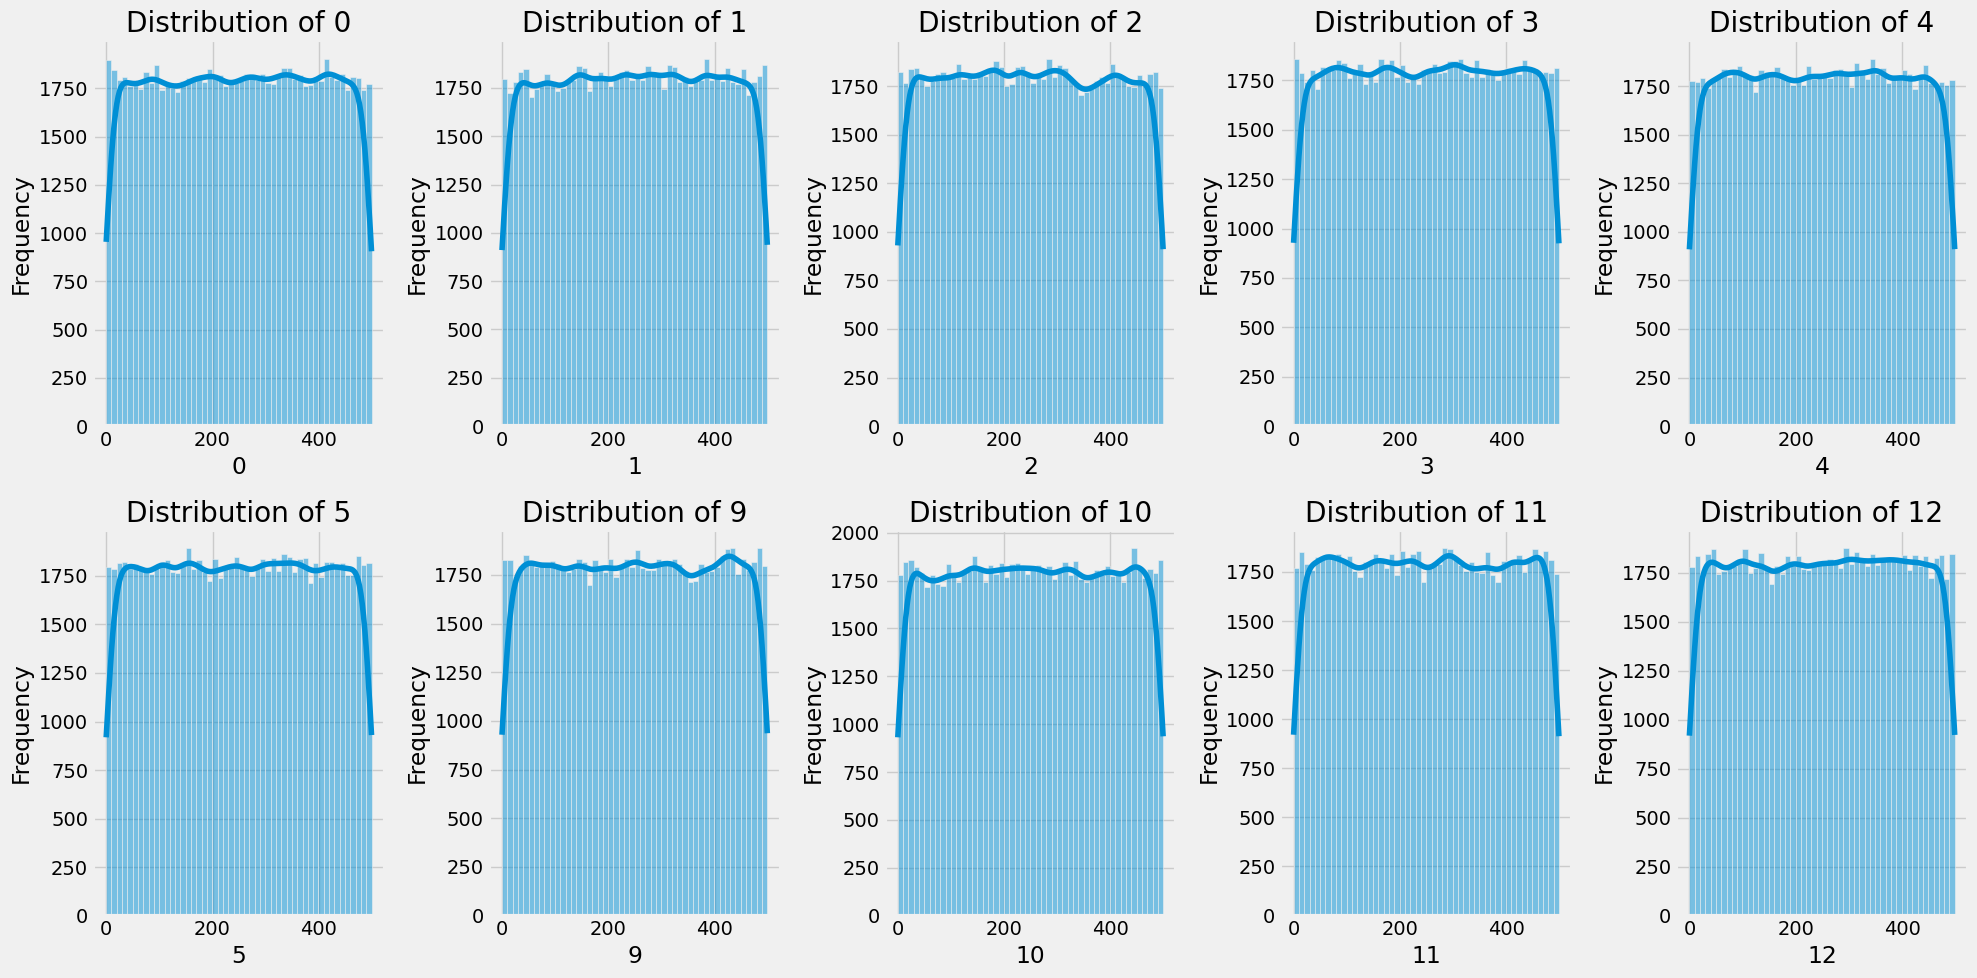

In [11]:
# List of columns with integer values from 1 to 500
integer_columns = ['0', '1', '2', '3', '4', '5', '9', '10', '11', '12']
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

# Plot the distribution of each column in a subplot
for i, column in enumerate(integer_columns):
    sns.histplot(train[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Given these columns have 500 unique values from 0 to 499 that are uniformly distributed, they can be of different nature such as categories, noise or irrelevant data or other. It may suggest they do not contribute meaningfully to the target variable prediction.

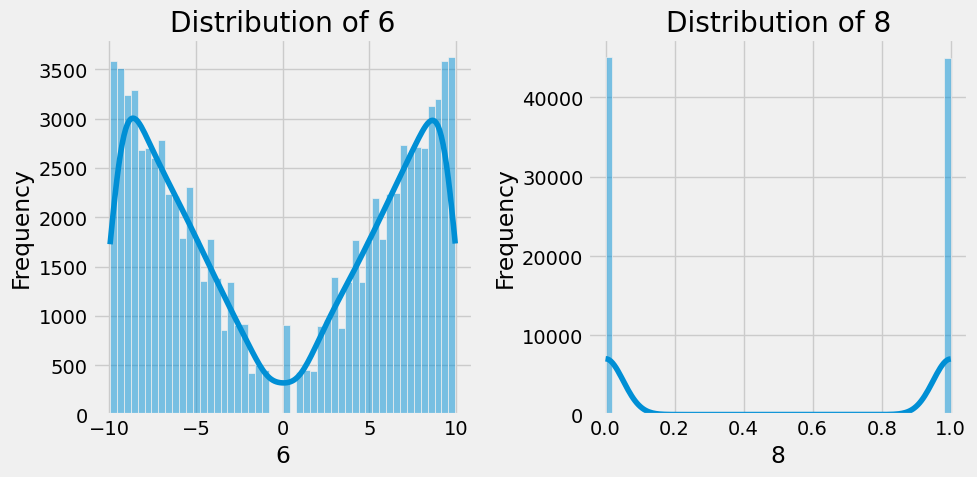

In [37]:
# More columns with unique values
other_unique_vals_columns = ['6', '8']
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.flatten()

# Plot the distribution of each column in a subplot
for i, column in enumerate(other_unique_vals_columns):
    sns.histplot(train[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

['7', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']
41


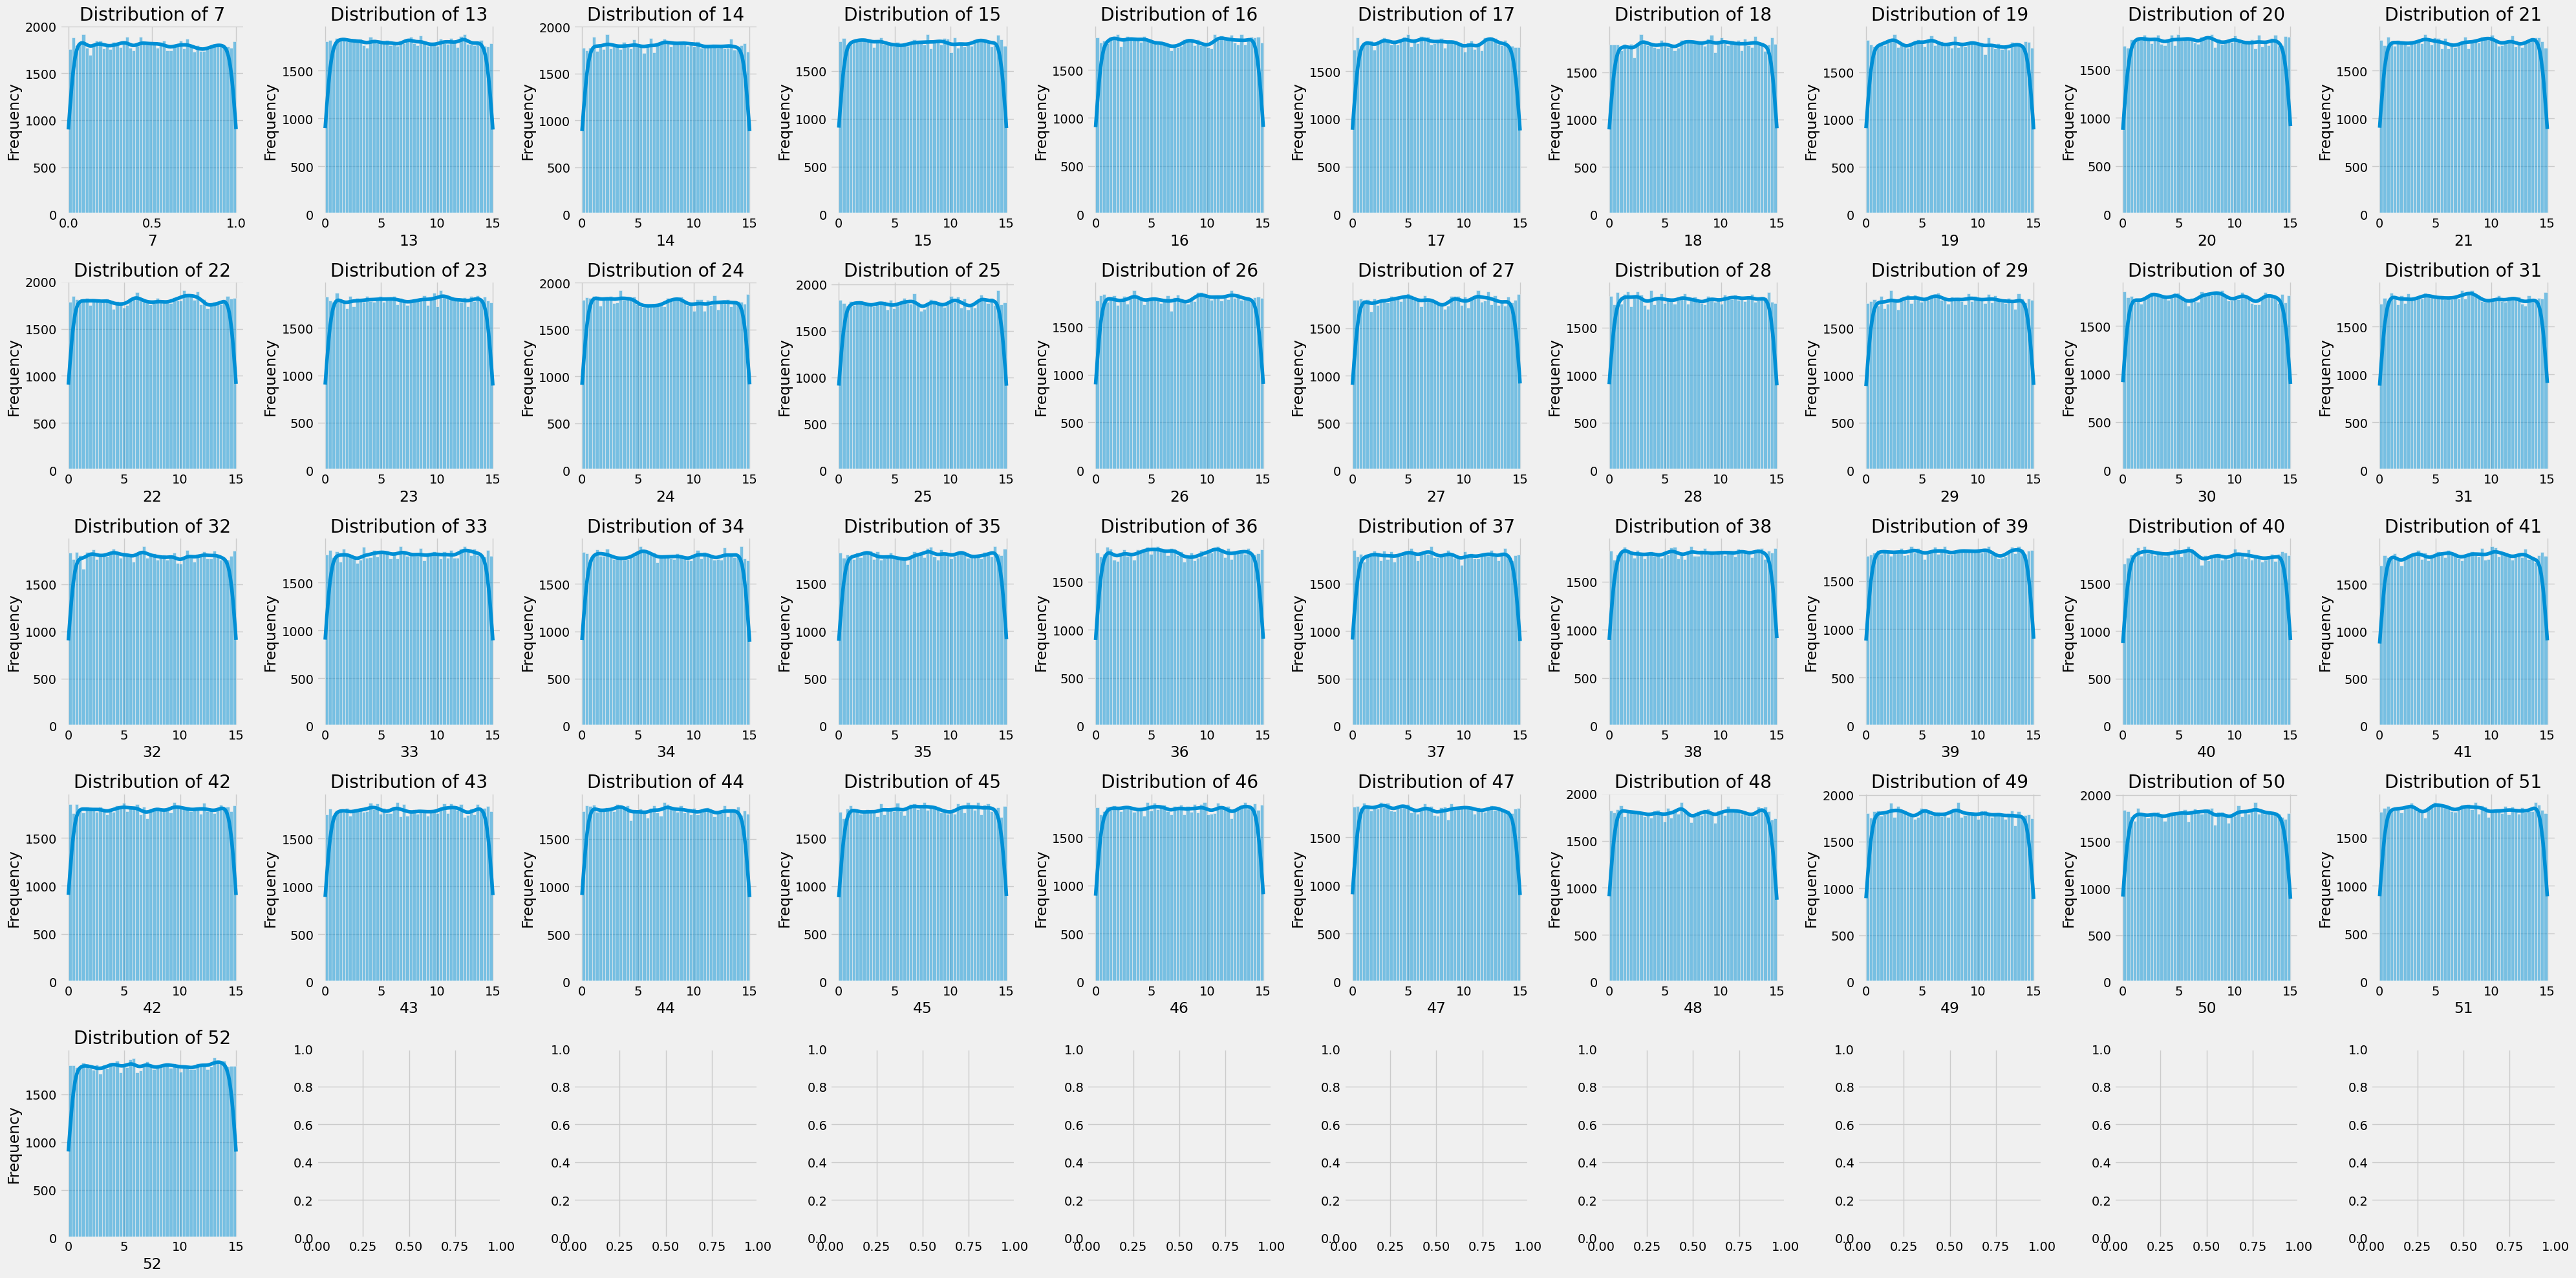

In [13]:
# Other features distribution
float_columns = [i for i in train.columns if i not in integer_columns and i not in other_uniqie_vals_columns and i !="target"]
print(float_columns)
print(len(float_columns))
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(40, 20))
axes = axes.flatten()

# Plot the distribution of each column in a subplot
for i, column in enumerate(float_columns):
    sns.histplot(train[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All other float features have distribution close to uniform. Let's look at correlation of features

### Bivariate analysis

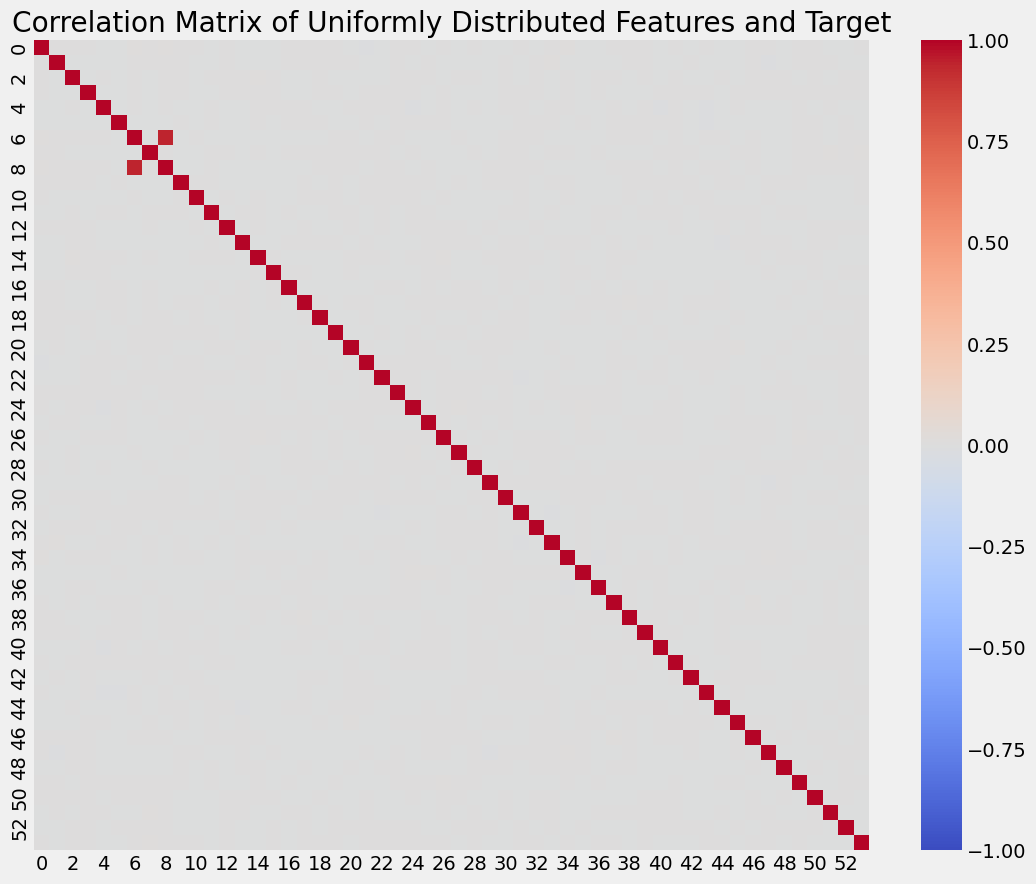

target    1.000000
7         0.012103
26        0.006370
39        0.006283
31        0.005077
25        0.004276
28        0.003451
10        0.003396
44        0.003092
17        0.002953
21        0.002874
3         0.002807
36        0.002624
49        0.002473
0         0.002427
12        0.002016
15        0.001653
37        0.001642
19        0.001520
9         0.001504
Name: target, dtype: float64


In [14]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Uniformly Distributed Features and Target')
plt.show()

corr_matrix

# Display correlation with the target variable
correlation_with_target = corr_matrix['target'].sort_values(ascending=False)
print(correlation_with_target.head(20))

As we can see, the features have almost zero correlation with the target and between each other. Features 6 and 8 have high correlation, which we already could see from their distributions above. Given such low correlation of features with the target, we can claim that some features might have low predictive power and assume that there are potential non-linear relationships with the target. So we might further choose some more advanced model than Linear Regression.

### Feature importance

In [15]:
# Define the features and target
X = train.drop('target', axis=1)
y = train['target']

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
for i, idx in enumerate(sorted_indices):
    print(f"Feature {X.columns[idx]}: Importance = {feature_importances[idx]}")

Feature 6: Importance = 0.9999006633808507
Feature 7: Importance = 9.930088203743012e-05
Feature 27: Importance = 7.442827242585648e-10
Feature 47: Importance = 7.409321053196102e-10
Feature 16: Importance = 7.401127774364415e-10
Feature 31: Importance = 7.370591223004937e-10
Feature 1: Importance = 7.361774601524084e-10
Feature 50: Importance = 7.359611073345835e-10
Feature 29: Importance = 7.318618341004206e-10
Feature 48: Importance = 7.318553441378209e-10
Feature 28: Importance = 7.289116187142778e-10
Feature 21: Importance = 7.281385634642859e-10
Feature 52: Importance = 7.276060889118434e-10
Feature 34: Importance = 7.26899559773707e-10
Feature 11: Importance = 7.241446020618955e-10
Feature 25: Importance = 7.238289972458372e-10
Feature 43: Importance = 7.229271905393388e-10
Feature 46: Importance = 7.228957344114653e-10
Feature 26: Importance = 7.227035352774072e-10
Feature 12: Importance = 7.225689214030814e-10
Feature 22: Importance = 7.216957187607569e-10
Feature 10: Importan

With an importance value of ~ 0.9999, Feature 6 may be primary predictor for our target variable. This suggests that this feature alone may contain almost all the information needed for prediction.
However we have already inspected that Feature 6 has almost zero correlation with the target so additional checks and exploration of features combination predictive power must be done.

### Model and Feature Selection

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [34]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Firstly, we need to have some baseline to assess the meaning of target metric.
# For that we can calculate the mean of the target variable

mean_target = y.mean()
print(f'Mean of target variable: {mean_target}')

# Predict the mean for all training instances
y_pred_baseline = np.full_like(y, mean_target)

# Calculate the RMSE for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
print(f'Baseline RMSE: {baseline_rmse}')

Mean of target variable: 50.03398098207432
Baseline RMSE: 28.897082151540577


In [28]:
# Let's try the simplest non-linear model
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation to estimate performance
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_dt = -cv_scores_dt.mean()
print(f'Cross-Validation RMSE with Decision Tree: {cv_rmse_dt}')

dt_model.fit(X_train, y_train)

# Make predictions on the val subset
dt_val_predictions = dt_model.predict(X_val)
dt_val_rmse = np.sqrt(mean_squared_error(y_val, dt_val_predictions))
print(f'RMSE with Decision Tree on Val set: {dt_val_rmse}')

Cross-Validation RMSE with Decision Tree: 0.009724294418450248
RMSE with Decision Tree on Val set: 0.007693832424989565


The results indicate that the Decision Tree model performs very well, with a Cross-Validation RMSE of approximately 0.0097 and a validation set RMSE of approximately 0.0077. These low RMSE values suggest that the model is accurately predicting the target variable.


***Cross-Validation RMSE:*** *an average measure of the model's performance across multiple folds. A low Cross-Validation RMSE indicates that the model generalizes well to different subsets of the training data.
***Validation Set RMSE***: an estimate of the model's performance on unseen data. A low validation set RMSE indicates that the model performs well on new, unseen data.*

Now that we have two baseline predictions, I would experiment with more complex models, and with a couple of features subsets, observed previously:

**Based on Distributions overview:**
- Subset of train without uniformly distributed integer columns
- Subset of train without uniformly distributed integer columns, Feature 6 and binary Feature 8

**Based on Random Forest feature importance:**
- Feature 6 as main predictor
- Top 5 features

In [39]:
X_train_full = X_train
X_val_full = X_val

# Subset of train without uniformly distributed integer columns (suposed as hi-card categorical columns)
X_train_no_cat = X_train.drop(columns=integer_columns)
X_val_no_cat = X_val.drop(columns=integer_columns)
# Subset of train without uniformly distributed integer columns, Feature 6 and binary Feature 8
X_train_floats = X_train_no_cat.drop(columns=other_unique_vals_columns)
X_val_floats = X_val_no_cat.drop(columns=other_unique_vals_columns)

# Feature 6
X_train_feature_6 = np.array(X_train['6']).reshape(-1, 1)
X_val_feature_6 = np.array(X_val['6']).reshape(-1, 1)
# Top 5 features from Random Forest regression:
top_features = ['6', '7', '27', '47', '16']
X_train_top5 = X_train[top_features]
X_val_top5 = X_val[top_features]

train_subsets = {
     'full_set': (X_train_full, X_val_full),
     'no_cat': (X_train_no_cat, X_val_no_cat),
     'no_un_vals': (X_train_floats, X_val_floats),
     'feature_6': (X_train_feature_6, X_val_feature_6),
     'top_5_features_rf': (X_train_top5, X_val_top5)
}

Now I want to compare different models' preformances for those subsets. So best approach could be chosen and optimised further.
Let's consider next non-linear models:
- Random Forest
- Decision Tree
- Gradient Boosting
- XGBoost


In [ ]:
for subset in train_subsets:
  print(f"Subset: {subset}")
  subset_train = train_subsets[subset][0]
  subset_val = train_subsets[subset][1]

  # Random Forest:
  rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
  # Perform cross-validation to estimate performance
  cv_scores_rf = cross_val_score(rf_model, subset_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
  cv_rmse_rf = -cv_scores_rf.mean()
  print(f'Cross-Validation RMSE with Random Forest: {cv_rmse_rf}')
  # Make predictions on the val subset
  rf_model.fit(subset_train, y_train)
  rf_val_predictions = rf_model.predict(subset_val)
  rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_val_predictions))
  print(f'RMSE with Random Forest on Val set: {rf_val_rmse}')

Subset: full_set
Cross-Validation RMSE with Random Forest: 0.006068992353277596
RMSE with Random Forest on Val set: 0.0038139644666017655
Subset: no_cat
Cross-Validation RMSE with Random Forest: 0.005860312687040631
RMSE with Random Forest on Val set: 0.0036835693183235904
Subset: no_un_vals
Cross-Validation RMSE with Random Forest: 29.029153350307407


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


for subset in train_subsets:
  print(f"Subset: {subset}")
  subset_train = train_subsets[subset][0]
  subset_val = train_subsets[subset][1]

  # Decision Tree:
  dt_model = DecisionTreeRegressor(random_state=42)
  # Perform cross-validation to estimate performance
  cv_scores_dt = cross_val_score(dt_model, subset_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
  cv_rmse_dt = -cv_scores_dt.mean()
  print(f'Cross-Validation RMSE with Decision Tree: {cv_rmse_dt}')
  # Make predictions on the val subset
  dt_model.fit(subset_train, y_train)
  dt_val_predictions = dt_model.predict(subset_val)
  dt_val_rmse = np.sqrt(mean_squared_error(y_val, dt_val_predictions))
  print(f'RMSE with Decision Tree on Val set: {dt_val_rmse}')

  # Gradient Boosting:
  gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
  # Perform cross-validation to estimate performance
  cv_scores_gb = cross_val_score(gb_model, subset_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
  cv_rmse_gb = -cv_scores_gb.mean()
  print(f'Cross-Validation RMSE with Gradient Boosting: {cv_rmse_gb}')
  gb_model.fit(subset_train, y_train)
  # Evaluate on validation set
  y_val_pred_gb = gb_model.predict(subset_val)
  val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
  print(f'Validation RMSE with Gradient Boosting: {val_rmse_gb}')

  # XGBoost:
  xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
  # Perform cross-validation to estimate performance
  cv_scores_xgb = cross_val_score(xgb_model, subset_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
  cv_rmse_xgb = -cv_scores_xgb.mean()
  print(f'Cross-Validation RMSE with XGBoost: {cv_rmse_xgb}')
  xgb_model.fit(subset_train, y_train)
  # Evaluate on validation set
  y_val_pred_xgb = xgb_model.predict(subset_val)
  val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
  print(f'Validation RMSE with XGBoost: {val_rmse_xgb}')

Subset: full_set
Cross-Validation RMSE with Decision Tree: 0.01153266539060407
RMSE with Decision Tree on Val set: 0.007693832424989565
Cross-Validation RMSE with Gradient Boosting: 0.4204836961482105
Validation RMSE with Gradient Boosting: 0.4167589861416168
Cross-Validation RMSE with XGBoost: 0.03827653292375888
Validation RMSE with XGBoost: 0.03212042254855688
Subset: no_cat
Cross-Validation RMSE with Decision Tree: 0.011133824672209108
RMSE with Decision Tree on Val set: 0.007477318948255725
Cross-Validation RMSE with Gradient Boosting: 0.42048621983404666
Validation RMSE with Gradient Boosting: 0.4167589861416164
Cross-Validation RMSE with XGBoost: 0.03687079368374477
Validation RMSE with XGBoost: 0.03287733676253839
Subset: no_un_vals
Cross-Validation RMSE with Decision Tree: 40.975423762759796
RMSE with Decision Tree on Val set: 41.04259942588152
Cross-Validation RMSE with Gradient Boosting: 28.903631137597387
Validation RMSE with Gradient Boosting: 29.0286455606138
Cross-Valida

XGBoost consistently showed lower RMSE values across different subsets compared to Gradient Boosting and Decision Tree, indicating more reliable performance.
While the Decision Tree and Random Forest performed well in some subsets, it had significant failures in others (e.g., "No Unique Values"), showing its sensitivity to the dataset's structure.

XGBoost effectively handled the complexity and non-linear relationships in the data, which Gradient Boosting struggled with, as indicated by its consistently higher RMSE values.

The robustness of XGBoost across different feature sets, especially in the "Full Set" and "Top 5 Features from Random Forest" subsets, demonstrated its ability to generalize well and produce stable results.